# Representing a Data Model in Tables

Primary keys and foreign key: The primary key is 'id' the foreign key is 'album_id'

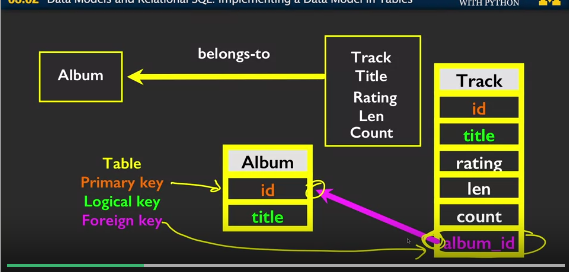

Basic Syntax for creating tables using SQL

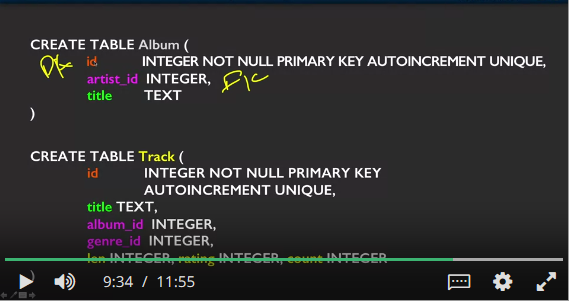

# Designing a Data Model

Basics of Building a Data-model

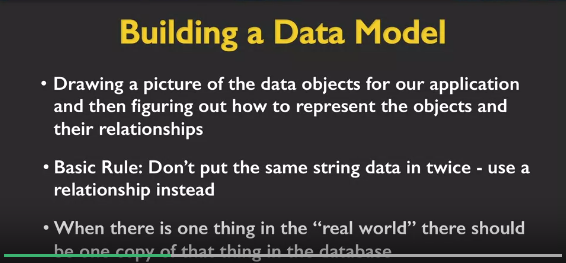

Some things to consider

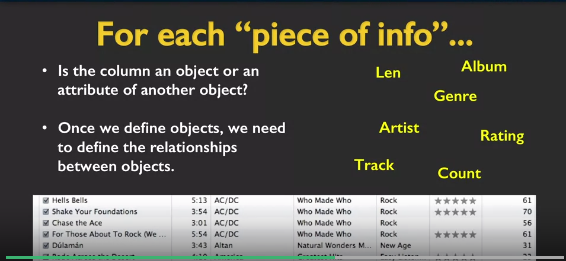

# Reconstructing Data with JOIN

Here is some information about what the JOIN operation is about

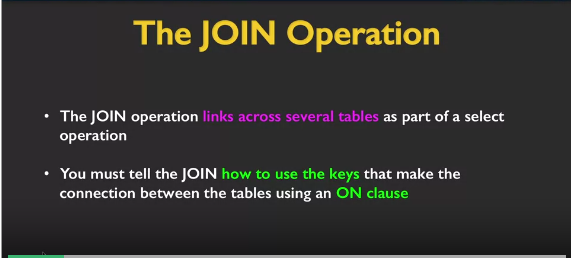

Here is a simple Examples of the JOIN operation

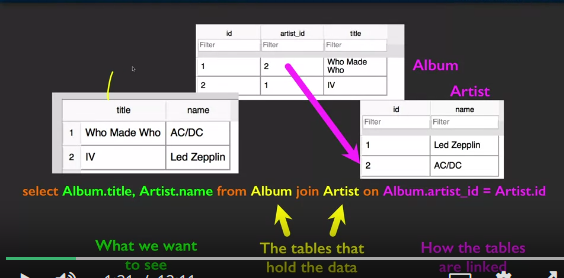

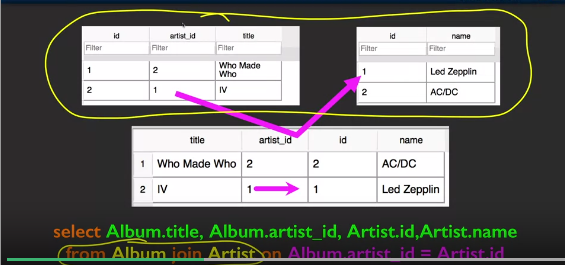

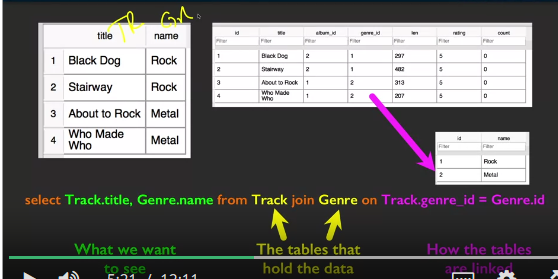

Here is an example of a all combination merge

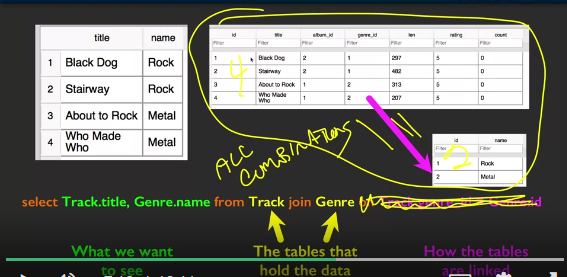

Some complex JOINs with SQL

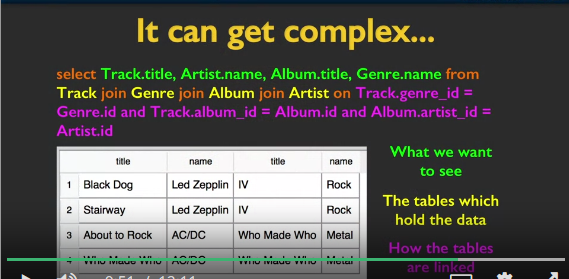

# Inserting Relational Data

Here are some examples of insert statements to use for bulding another database

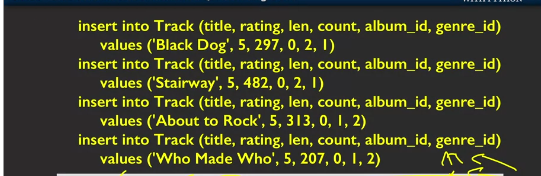

# SQL Database Example

In [2]:
# import xlm tree and sqlite packages
import xml.etree.ElementTree as ET
import sqlite3

In [3]:
# Create connection to Database
conn = sqlite3.connect('trackdbAss.sqlite')
cur = conn.cursor()

In [4]:

# Make some fresh tables using executescript()
cur.executescript('''
DROP TABLE IF EXISTS Artist;
DROP TABLE IF EXISTS Album;
DROP TABLE IF EXISTS Track;
DROP TABLE IF EXISTS Genre;

CREATE TABLE Artist (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name    TEXT UNIQUE
);

CREATE TABLE Genre (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name    TEXT 
);

CREATE TABLE Album (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    artist_id  INTEGER,
    title   TEXT UNIQUE
);

CREATE TABLE Track (
    id  INTEGER NOT NULL PRIMARY KEY 
        AUTOINCREMENT UNIQUE,
    title TEXT  UNIQUE,
    album_id  INTEGER,
    genre_id  INTEGER,
    len INTEGER, rating INTEGER, count INTEGER
);
''')


fname = input('Enter file name: ')
if ( len(fname) < 1 ) : fname = 'Library.xml'

# <key>Track ID</key><integer>369</integer>
# <key>Name</key><string>Another One Bites The Dust</string>
# <key>Artist</key><string>Queen</string>
def lookup(d, key):
    found = False
    for child in d:
        if found : return child.text
        if child.tag == 'key' and child.text == key :
            found = True
    return None

stuff = ET.parse(fname)



Enter file name: Library_1.xml


In [5]:
all1 = stuff.findall('dict/dict/dict') # finds thrid level dictonaries
print('Dict count:', len(all1))
for entry in all1:
    if ( lookup(entry, 'Track ID') is None ) : continue
    name = lookup(entry, 'Name')
    artist = lookup(entry, 'Artist')
    album = lookup(entry, 'Album')
    count = lookup(entry, 'Play Count')
    rating = lookup(entry, 'Rating')
    length = lookup(entry, 'Total Time')
    genre = lookup(entry, 'Genre')

    if name is None or artist is None or album is None or genre is None:
        continue 
    else:
        print(name, artist, album, count, rating, length)
        cur.execute('''INSERT OR IGNORE INTO Artist (name) 
            VALUES ( ? )''', ( artist, ) )
        cur.execute('SELECT id FROM Artist WHERE name = ? ', (artist, ))
        artist_id = cur.fetchone()[0]

        cur.execute(''' INSERT OR IGNORE INTO Genre (name) VALUES ( ? )''', (genre, ))
        cur.execute('SELECT id FROM Genre WHERE name = ? ', (genre, ))
        genre_id = cur.fetchone()[0]
        
        cur.execute('''INSERT OR IGNORE INTO Album (title, artist_id) 
            VALUES ( ?, ? )''', ( album, artist_id ) )
        cur.execute('SELECT id FROM Album WHERE title = ? ', (album, ))
        album_id = cur.fetchone()[0]
        
        cur.execute('''INSERT OR REPLACE INTO Track
            (title, album_id, len, rating, count, genre_id) VALUES ( ?, ?, ?, ?, ?, ? )''', ( name, album_id, length, rating, count , genre_id,) )

        conn.commit()

Dict count: 404
Another One Bites The Dust Queen Greatest Hits 55 100 217103
Asche Zu Asche Rammstein Herzeleid 79 100 231810
Beauty School Dropout Various Grease 48 100 239960
Black Dog Led Zeppelin IV 109 100 296620
Bring The Boys Back Home Pink Floyd The Wall [Disc 2] 33 100 87118
Circles Bryan Lee Blues Is 54 60 355369
Comfortably Numb Pink Floyd The Wall [Disc 2] 36 100 384130
Crazy Little Thing Called Love Queen Greatest Hits 38 100 163631
Electric Funeral Black Sabbath Paranoid 44 100 293015
Fat Bottomed Girls Queen Greatest Hits 38 100 257515
For Those About To Rock (We Salute You) AC/DC Who Made Who 84 100 353750
Four Sticks Led Zeppelin IV 84 100 284421
Furious Angels Rob Dougan The Matrix Reloaded 54 100 330004
Gelle Bryan Lee Blues Is 45 60 199836
Going To California Led Zeppelin IV 100 100 215666
Grease Various Grease 42 100 205792
Hand of Doom Black Sabbath Paranoid 36 100 429609
Hells Bells AC/DC Who Made Who 82 100 312946
Hey You Pink Floyd The Wall [Disc 2] 23 100 2823

Retirement Kaiser Chiefs Yours Truly, Angry Mob 10 None 237426
The Angry Mob [Live From Berlin] Kaiser Chiefs Yours Truly, Angry Mob 40 None 279066
I Like To Fight Kaiser Chiefs Yours Truly, Angry Mob 8 None 218566
From The Neck Down Kaiser Chiefs Yours Truly, Angry Mob 15 None 147226
The Wisdom of Crowds: Why the Many Are Smarter than the Few Part 1 of 3 James Surowiecki The Wisdom of Crowds: Why the Many Are Smarter than the Few (Abridged Nonfiction) 15 None 8586749
The Wisdom of Crowds: Why the Many Are Smarter than the Few Part 2 of 3 James Surowiecki The Wisdom of Crowds: Why the Many Are Smarter than the Few (Abridged Nonfiction) 9 None 8443432
The Wisdom of Crowds: Why the Many Are Smarter than the Few Part 3 of 3 James Surowiecki The Wisdom of Crowds: Why the Many Are Smarter than the Few (Abridged Nonfiction) 3 None 4168829
The Wisdom of Crowds: Why the Many Are Smarter Than the Few (Unabridged) Part 1 of 5 James Surowiecki The Wisdom of Crowds: Why the Many Are Smarter Than t

PHP-01-Intro.mp3 Created by Sakai SI 664 W14's official Podcast. None None 2250624
PHP-02-Install.mp3 Created by Sakai SI 664 W14's official Podcast. 1 None None
PHP-04-Expressions.mp3 Created by Sakai SI 664 W14's official Podcast. None None 2168064
PHP-05-Functions.mp3 Created by Sakai SI 664 W14's official Podcast. None None 1446792
PHP-06-Strings.mp3 Created by Sakai SI 664 W14's official Podcast. None None 417696
PHP-12-Sessions.mp3 Created by Sakai SI 664 W14's official Podcast. None None 3624312
PHP-06-Objects.mp3 Created by Sakai SI 664 W14's official Podcast. None None 2455368
SI664-13-JSON-A.mp3 Created by Sakai SI 664 W14's official Podcast. None None 4407672
PHP-13-JavaScript.mp3 Created by Sakai SI 664 W14's official Podcast. None None 3650088
PHP-09-Database-Design.mp3 Created by Sakai SI 664 W14's official Podcast. None None 3591072
PHP-Tsugi-Install.mp3 Created by Sakai SI 664 W14's official Podcast. None None 3181656
PHP-10-MySQL-PDO.mp3 Created by Sakai SI 664 W14's o